In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
import matplotlib
import scipy
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
from matplotlib.colors import LogNorm
import pickle
import numpy.typing as npt
from typing import Optional
from matplotlib.colors import ListedColormap
plt.style.use('science')
matplotlib.rcParams.update({'font.size': 25})

In [2]:
Tobs =63115195
dT = 6 * 3600 # length of each chunk in seconds
nT = int(Tobs/dT) # length of each time chunk 

dt = 5
fmax = 1 / dt / 2
dF = fmin = 1 / dT
nF = int((fmax - fmin) / dF) + 1  # bins per segment
f_seg = np.arange(1,nF+1) * dF  # segment frequencies
t_seg = np.arange(nT) * dT

nperseg = int(dT // dt)  # samples per segment

In [3]:
TF_gapped = np.load('../Shared_data_files/Whitened_gapped_tf.npy',allow_pickle=True)

In [4]:
Observable_sources = pickle.load(open("../Shared_data_files/Observable_sources.pickle", "rb"))
Unobservable_sources = pickle.load(open("../Shared_data_files/Unobservable_sources.pickle", "rb"))

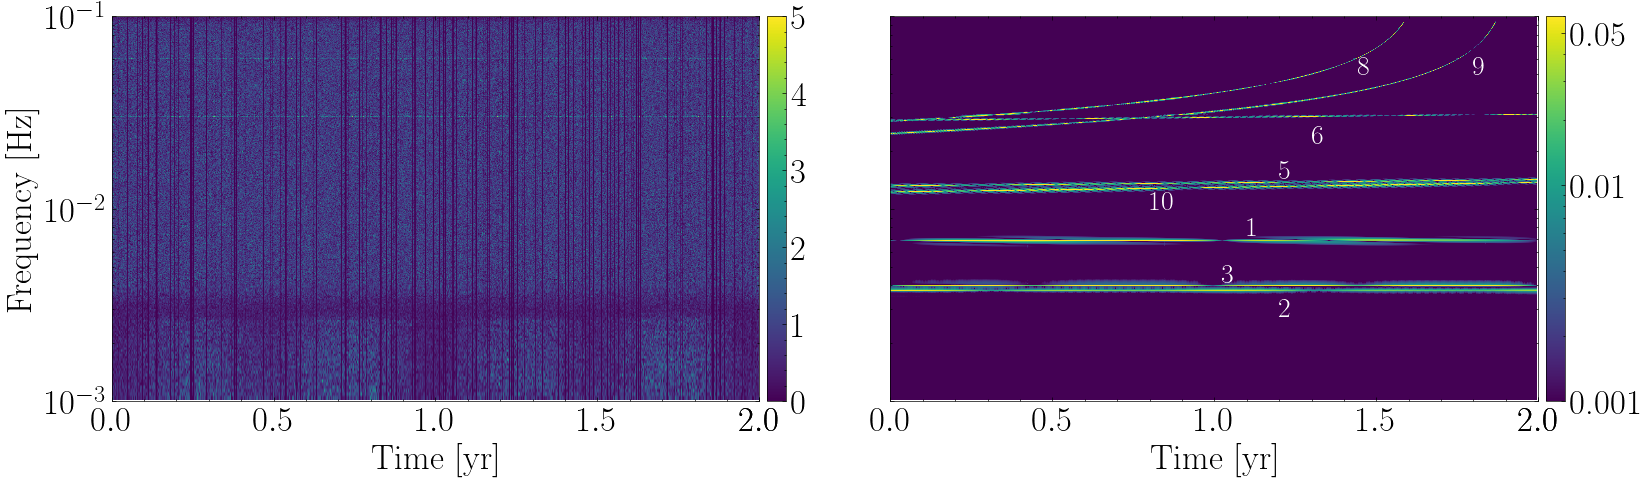

In [40]:
fig = plt.figure(figsize=(20,5))
gs = gridspec.GridSpec(nrows=1, ncols=2)
ax0 = fig.add_subplot(gs[0, 0],rasterized=True)
frequency_min = 1.e-3
f_mask = f_seg >= frequency_min
im = ax0.imshow(TF_gapped[f_mask,:], origin='lower', extent=[t_seg.min()/(365.25*24*60*60), t_seg.max()/(365.25*24*60*60), f_seg[f_mask].min(), f_seg[f_mask].max()], aspect='auto',vmax=5)
cbar = fig.colorbar(im, ax=ax0,pad=0.01)


ax0.set_ylim(1.e-3,)
ax0.semilogy()
ax0.set_xlabel('Time [yr]')
ax0.set_ylabel('Frequency [Hz]')



######## top right plot: tf 

##### Generating fseg and tseg for the top right plot, noiseless spectrogram
Tobs =63115195.0
dT_12_hour = 12 * 3600 # length of each chunk in seconds 12 HOUR SEGMENTS FOR VISUALISATION
nT_12_hour = int(Tobs/dT_12_hour) # length of each time chunk 

dt = 5
fmax = 1 / dt / 2
dF_12_hour = fmin = 1 / dT_12_hour
nF_12_hour = int((fmax - fmin) / dF_12_hour) + 1  # bins per segment
f_seg_12_hour = np.arange(1,nF_12_hour+1) * dF_12_hour  # segment frequencies
t_seg_12_hour = np.arange(nT_12_hour) * dT_12_hour

data_tf_noiseless = np.load('../Shared_data_files/yorsh_signals_only_visualisation_whitened.npy',allow_pickle=True)
offset = 0.05  # adjust as needed

ax0_1 = fig.add_subplot(gs[0, 1],sharey=ax0,rasterized=True)

# whitened_signals = ax0_1.(t_seg_12_hour/(365.25*24*60*60),f_seg_12_hour,
#                  data_tf_noiseless,
#                  shading='nearest')
# cbar = fig.colorbar(whitened_signals,pad=0.01)

im = ax0_1.imshow(data_tf_noiseless,
                   origin='lower', 
                   extent=[t_seg.min()/(365.25*24*60*60), t_seg.max()/(365.25*24*60*60), f_seg[f_mask].min(), f_seg[f_mask].max()], 
                   aspect='auto',norm=LogNorm(vmin=1e-3, vmax=6e-2))
cbar = fig.colorbar(im, ax=ax0_1,pad=0.01,ticks=[1e-3, 1e-2, 5.e-2])

cbar.set_ticklabels([1e-3, 1e-2, 5.e-2])


# for i, (Name, tf) in enumerate(zip(list(Observable_sources.keys()), list(Observable_sources.values()))):
#     times, freqs = tf
#     idx = len(times) // 2
#     x = times[idx]/(365.25*24*60*60) + i * offset
#     y = freqs[idx]
#     ax0_1.annotate(Name[-2:], 
#                 xy=(x, y), 
#                 fontsize=20, color='white')

# for j, (Name, tf) in enumerate(zip(list(Unobservable_sources.keys()), list(Unobservable_sources.values()))):
#     times, freqs = tf
#     idx = len(times) // 2
#     x = times[idx]/(365.25*24*60*60) + (j + len(Observable_sources)) * offset
#     y = freqs[idx]*1.175
#     ax0_1.annotate(Name[-1], 
#                 xy=(x, y), 
#                 fontsize=20, color='white')
    

ax0_1.annotate('1',xy=(0.55,0.43),fontsize=20,color='white',xycoords='axes fraction')

ax0_1.annotate('2',xy=(0.6,0.22),fontsize=20,color='white',xycoords='axes fraction')
ax0_1.annotate('3',xy=(0.51,0.31),fontsize=20,color='white',xycoords='axes fraction')

ax0_1.annotate('5',xy=(0.6,0.58),fontsize=20,color='white',xycoords='axes fraction')
ax0_1.annotate('10',xy=(0.4,0.5),fontsize=20,color='white',xycoords='axes fraction')

ax0_1.annotate('6',xy=(0.65,0.67),fontsize=20,color='white',xycoords='axes fraction')

ax0_1.annotate('9',xy=(0.9,0.85),fontsize=20,color='white',xycoords='axes fraction')
ax0_1.annotate('8',xy=(0.72,0.85),fontsize=20,color='white',xycoords='axes fraction')



ax0_1.set_xlabel('Time [yr]')
# ax0_1.set_yticks([])
xticks = list(ax0.get_xticks())  # get current ticks
xticks.append(2.)                 # add your desired tick (in same units as x-axis)
ax0.set_xticks(sorted(xticks))

xticks = list(ax0_1.get_xticks())  # get current ticks
xticks.append(2.)                 # add your desired tick (in same units as x-axis)
ax0_1.set_xticks(sorted(xticks))


plt.setp(ax0_1.get_yticklabels(), visible=False)

# Clear up space a bit 
plt.subplots_adjust(hspace=0.3)

# Squish two plots together
plt.subplots_adjust(wspace=0.01)

plt.savefig('Fig_1.pdf')
plt.show()